In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
DATA_PATH = '/Users/megantabbutt/BRT_data/GeoData/'
DATA_PATH_Dems = '/Users/megantabbutt/BRT_data/DemographicData/'

RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
CitiesShapeFile = "Shapes/City/City_Limit.shp"
LakesShapeFile = "Shapes/Lakes/Lakes_and_Rivers.shp"
StreetsShapeFile = "Shapes/Street/Street_Centerlines_and_Pavement_Data.shp"


cityShapes_df = geopandas.read_file(CitiesShapeFile)
lakeShapes_df = geopandas.read_file(LakesShapeFile)
streetShapes_df = geopandas.read_file(StreetsShapeFile)

In [4]:
df = geopandas.read_file(DATA_PATH+"tl_2018_55_bg.shp")

In [5]:
df_dane = df[df['COUNTYFP'] == "025"]
df_dane.head(3)

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104..."
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058..."
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041..."


In [6]:
df_mad = pd.read_csv(DATA_PATH_Dems + "VehicleOwnership_2018.txt", sep='\t')
df_mad.info()
df_mad.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   GEOID                 310 non-null    int64
 1   Owner_noVehicle       310 non-null    int64
 2   Renter_noVehicle      310 non-null    int64
 3   AggVehiclesAvailable  310 non-null    int64
 4   Total                 310 non-null    int64
dtypes: int64(5)
memory usage: 12.2 KB


,GEOID,Owner_noVehicle,Renter_noVehicle,AggVehiclesAvailable,Total
0,550250121001,0,0,709,543
1,550250127002,11,0,1713,1482
2,550250121002,0,0,914,690


In [7]:
df_mad = pd.read_csv(DATA_PATH_Dems + "VehicleOwnership_2018.txt", sep='\t')
df_mad.info()
df_mad.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   GEOID                 310 non-null    int64
 1   Owner_noVehicle       310 non-null    int64
 2   Renter_noVehicle      310 non-null    int64
 3   AggVehiclesAvailable  310 non-null    int64
 4   Total                 310 non-null    int64
dtypes: int64(5)
memory usage: 12.2 KB


,GEOID,Owner_noVehicle,Renter_noVehicle,AggVehiclesAvailable,Total
0,550250121001,0,0,709,543
1,550250127002,11,0,1713,1482
2,550250121002,0,0,914,690


In [8]:
geoIDs_Master = [int(i) for i in list(df_dane['GEOID'])]
type(geoIDs_Master[0])

int

In [9]:
VehiclesPerCapita = dict()
for ID in geoIDs_Master:
    localDF = df_mad[df_mad['GEOID'] == ID]
    totalNoCar = df_mad.loc[df_mad['GEOID'] == ID, 'Owner_noVehicle'].item() + df_mad.loc[df_mad['GEOID'] == ID, 'Renter_noVehicle'].item()
    if localDF['AggVehiclesAvailable'].item() != -999:
        number = int(localDF['AggVehiclesAvailable'].item()) / int(localDF['Total'].item())
        #number = (int(localDF['Owner_noVehicle'].item()) + int(localDF['Renter_noVehicle'].item()))/int(localDF['AggVehiclesAvailable'].item())         
    else:
        number = None
    VehiclesPerCapita[ID] = number
    
#VehiclesPerCapita

In [10]:
df_dane['VehiclesPerCapita'] = list(VehiclesPerCapita.values())
df_dane.head(3)

/Users/megantabbutt/Library/Python/3.8/lib/python/site-packages/geopandas/geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,VehiclesPerCapita
570,55,025,002000,1,550250020001,Block Group 1,G5030,S,607897,1617,+43.1040466,-089.3349658,"POLYGON ((-89.34179 43.10456, -89.34163 43.104...",0.787383
577,55,025,001300,1,550250013001,Block Group 1,G5030,S,1070101,503,+43.0541194,-089.3889560,"POLYGON ((-89.40006 43.05842, -89.39907 43.058...",0.736369
578,55,025,001401,1,550250014011,Block Group 1,G5030,S,2579158,42576,+43.0468061,-089.3795062,"POLYGON ((-89.39403 43.04175, -89.39313 43.041...",0.777480


In [11]:
#GeoID_mad = [str(i) for i in list(df_mad['GEOID'])]
#print(len(GeoID_mad), GeoID_mad[:5])

#GeoID_dane = [i for i in list(df_dane['GEOID'])]
#print(len(GeoID_dane), GeoID_dane[:5])

In [12]:
#from mpl_toolkits.axes_grid1 import make_axes_locatable

#fig, ax = plt.subplots(1, 1, figsize=(16, 16))

#divider = make_axes_locatable(ax)

#cax = divider.append_axes("right", size="5%", pad=-1.5)

#df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, cax=cax, cmap='magma')

#lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
#streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

#ax.set_facecolor("#e7e3e0")

#ax.set_xlim(-89.6, -89.2)
#ax.set_ylim(42.97, 43.2)
#ax.set_yticks([])
#ax.set_xticks([])

#plt.legend()
#fig.suptitle("Vehicles per Capita", fontsize=18, x=.55, y=.76)
#plt.show()

In [13]:
route_freq_wkday = {2: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    4: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    5: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    6: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 3, 23: 1}, 
                    7: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    8: {7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    10: {6: 1, 7: 4, 8: 4, 9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 4, 17: 4, 18: 2}, 
                    11: {6: 1, 7: 1, 8: 1, 9: 1, 15: 2, 16: 1, 17: 1}, 
                    12: {6: 1, 7: 1, 8: 1, 9: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 
                    13: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    15: {6: 1, 7: 2, 8: 2, 9: 2, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    16: {5: 1, 6: 3, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
                    17: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    18: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    20: {6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 1}, 
                    21: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}, 
                    22: {5: 2, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    23: {6: 1, 7: 2, 8: 1, 16: 2, 17: 2}, 
                    26: {6: 1, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    27: {6: 1, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    30: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 1}, 
                    31: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    32: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    33: {5: 1, 6: 2, 7: 2, 8: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    36: {7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    39: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1}, 
                    40: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    44: {6: 2, 7: 2, 8: 2, 9: 1, 14: 1, 15: 1, 16: 2, 17: 2, 18: 1}, 
                    48: {6: 1, 7: 2, 16: 1, 17: 2}, 
                    49: {6: 2, 7: 2, 8: 1, 16: 2, 17: 2, 18: 1}, 
                    50: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2, 23: 1}, 
                    51: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    52: {6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    55: {6: 1, 7: 1, 8: 1, 16: 1, 17: 2, 18: 1}, 
                    67: {5: 1, 6: 2, 7: 2, 8: 2, 9: 2, 10: 2, 11: 2, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2, 21: 2, 22: 2}, 
                    70: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1}, 
                    72: {6: 1, 7: 2, 8: 1, 15: 2, 16: 2, 17: 2, 18: 1}, 
                    73: {5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1}, 
                    75: {6: 2, 7: 1, 8: 2, 16: 2, 17: 1, 18: 2}, 
                    81: {0: 2, 1: 2, 18: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
                    82: {0: 2, 1: 2, 2: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2}, 
                    84: {9: 4, 10: 4, 11: 4, 12: 4, 13: 4, 14: 4, 15: 4, 16: 5, 17: 4, 18: 4}}

In [14]:
route_freq_wkday[2][6]

2

In [15]:
RoutesShapeFile = "mmt_gtfs/Metro_Transit_Bus_Routes.shp"
routesShapes_df = geopandas.read_file(RoutesShapeFile)
routesShapes_df.info()
routesShapes_df.head(3)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    47 non-null     int64   
 1   trips_rout  47 non-null     int64   
 2   route_shor  47 non-null     int64   
 3   route_url   47 non-null     object  
 4   ShapeSTLen  47 non-null     float64 
 5   geometry    47 non-null     geometry
dtypes: float64(1), geometry(1), int64(3), object(1)
memory usage: 2.3+ KB


,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733..."
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039..."
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939..."


In [16]:
def route_freq_time(time24):
    frequency = []
    for i in list(routesShapes_df['route_shor']):
        if int(i) in route_freq_wkday:
            if time24 in route_freq_wkday[int(i)]:
                frequency.append(route_freq_wkday[int(i)][time24])
            else: 
                frequency.append(0)
        else:
            frequency.append(0)
    
    if len(frequency) == 47:   
        return frequency

print(route_freq_time(6))

[2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0]


In [17]:
routesShapes_df['frequency_1am'] = route_freq_time(1)
routesShapes_df['frequency_2am'] = route_freq_time(2)
routesShapes_df['frequency_3am'] = route_freq_time(3)
routesShapes_df['frequency_4am'] = route_freq_time(4)
routesShapes_df['frequency_5am'] = route_freq_time(5)
routesShapes_df['frequency_6am'] = route_freq_time(6)
routesShapes_df['frequency_7am'] = route_freq_time(7)
routesShapes_df['frequency_8am'] = route_freq_time(8)
routesShapes_df['frequency_9am'] = route_freq_time(9)
routesShapes_df['frequency_10am'] = route_freq_time(10)
routesShapes_df['frequency_11am'] = route_freq_time(11)
routesShapes_df['frequency_12pm'] = route_freq_time(12)
routesShapes_df['frequency_1pm'] = route_freq_time(13)
routesShapes_df['frequency_2pm'] = route_freq_time(14)
routesShapes_df['frequency_3pm'] = route_freq_time(15)
routesShapes_df['frequency_4pm'] = route_freq_time(16)
routesShapes_df['frequency_5pm'] = route_freq_time(17)
routesShapes_df['frequency_6pm'] = route_freq_time(18)
routesShapes_df['frequency_7pm'] = route_freq_time(19)
routesShapes_df['frequency_8pm'] = route_freq_time(20)
routesShapes_df['frequency_9pm'] = route_freq_time(21)
routesShapes_df['frequency_10pm'] = route_freq_time(22)
routesShapes_df['frequency_11pm'] = route_freq_time(23)
routesShapes_df['frequency_12am'] = route_freq_time(0)
routesShapes_df.head(3)

,OBJECTID,trips_rout,route_shor,route_url,ShapeSTLen,geometry,frequency_1am,frequency_2am,frequency_3am,frequency_4am,...,frequency_3pm,frequency_4pm,frequency_5pm,frequency_6pm,frequency_7pm,frequency_8pm,frequency_9pm,frequency_10pm,frequency_11pm,frequency_12am
0,422,9279,2,http://www.cityofmadison.com/metro/routes-sche...,96906.965571,"MULTILINESTRING ((-89.47360 43.05362, -89.4733...",0,0,0,0,...,2,2,2,2,2,2,2,2,1,0
1,423,9281,4,http://www.cityofmadison.com/metro/routes-sche...,64774.133485,"MULTILINESTRING ((-89.40392 43.03862, -89.4039...",0,0,0,0,...,2,2,2,1,1,1,1,1,0,0
2,424,9282,5,http://www.cityofmadison.com/metro/routes-sche...,61216.722662,"MULTILINESTRING ((-89.39414 43.03849, -89.3939...",0,0,0,0,...,2,2,2,2,1,1,1,1,1,0


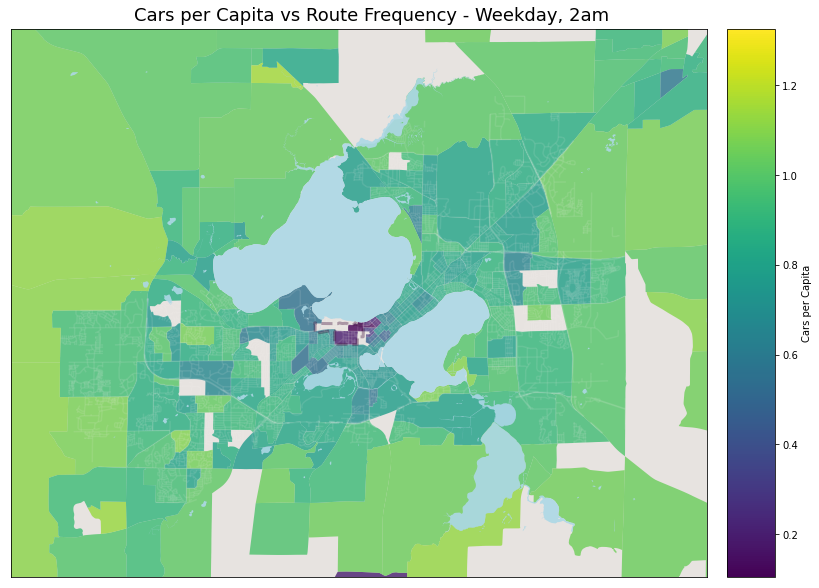

In [28]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 2am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency2am'
colName = 'frequency_2am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='viridis', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

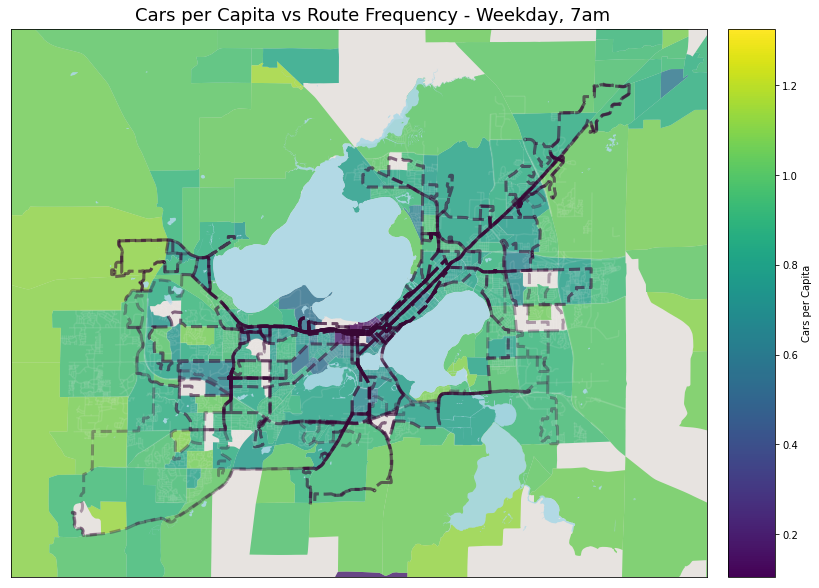

In [31]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 7am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency7am'
colName = 'frequency_7am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='viridis', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

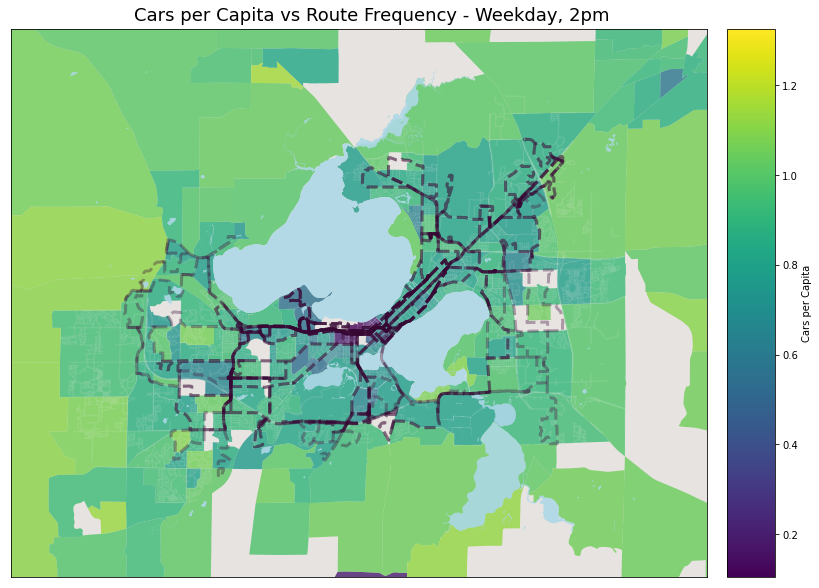

In [32]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 2pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency2pm'
colName = 'frequency_2pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='viridis', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

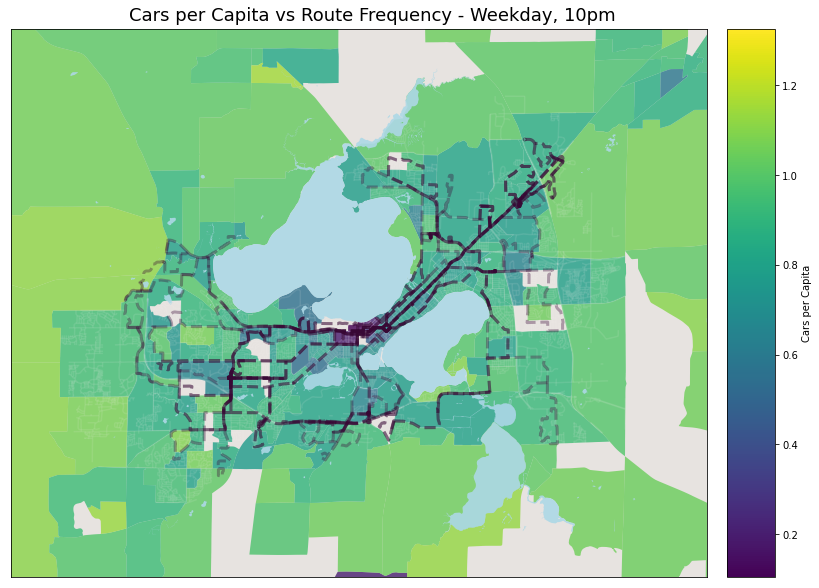

In [33]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 10pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency10pm'
colName = 'frequency_10pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='viridis', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

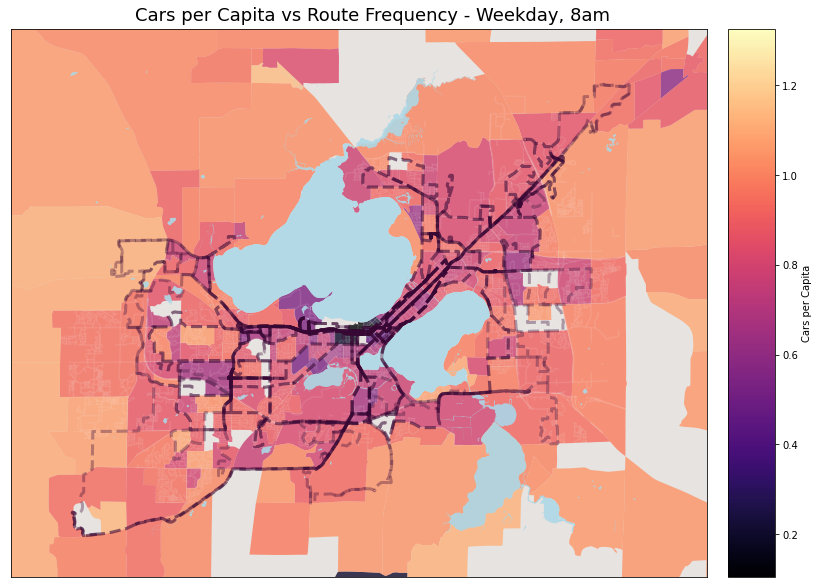

In [26]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 8am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency8am'
colName = 'frequency_8am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
#plt.savefig(savefigName, bbox_inches='tight')
plt.show()

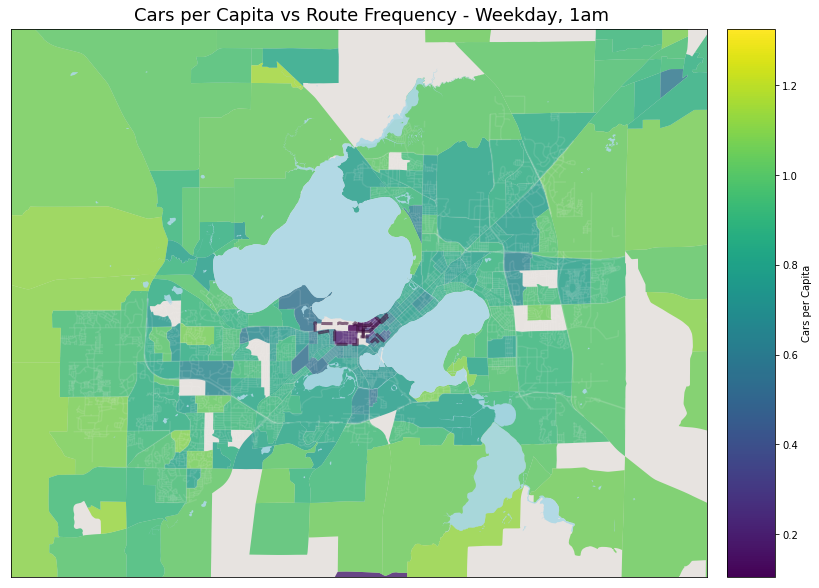

In [24]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 1am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency1am'
colName = 'frequency_1am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='viridis', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

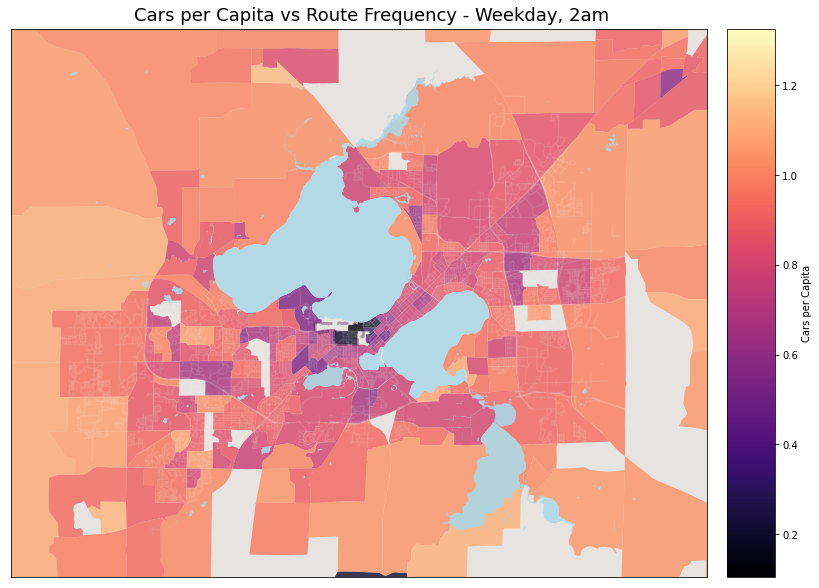

In [19]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 2am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency2am'
colName = 'frequency_2am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

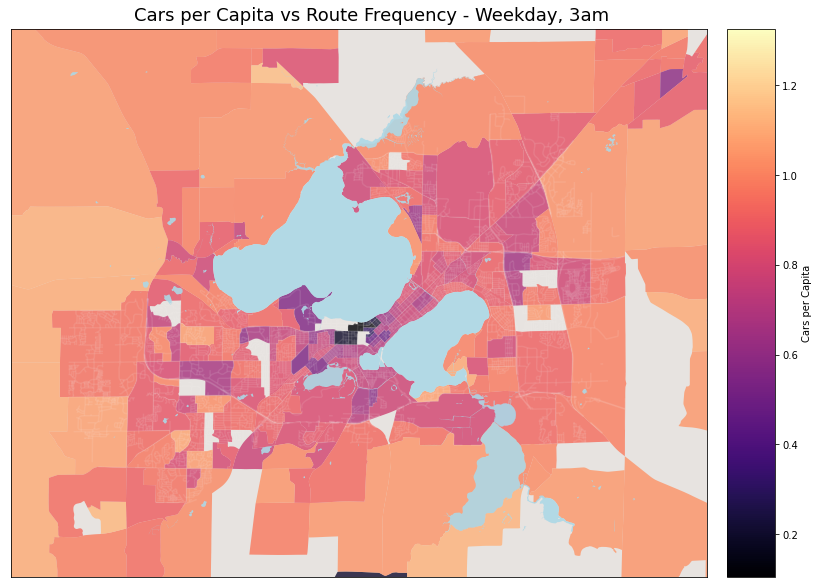

In [20]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 3am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency3am'
colName = 'frequency_3am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

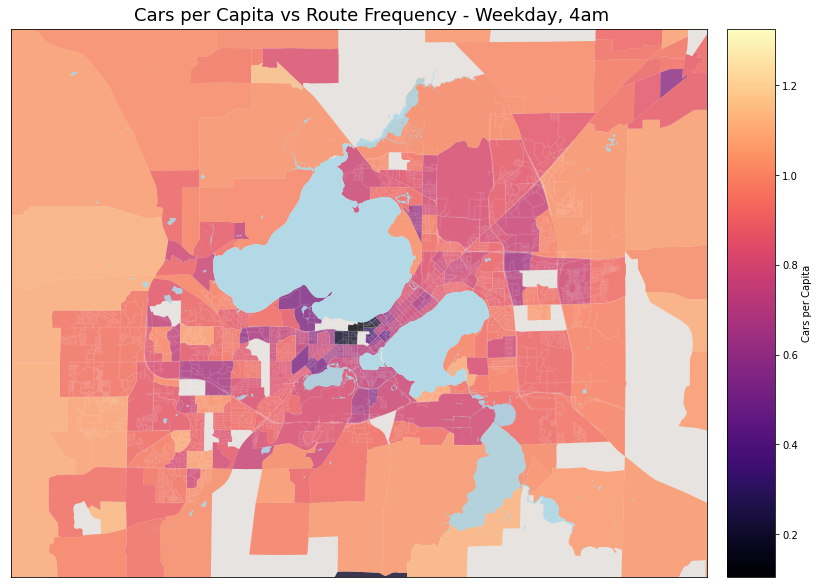

In [21]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 4am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency4am'
colName = 'frequency_4am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

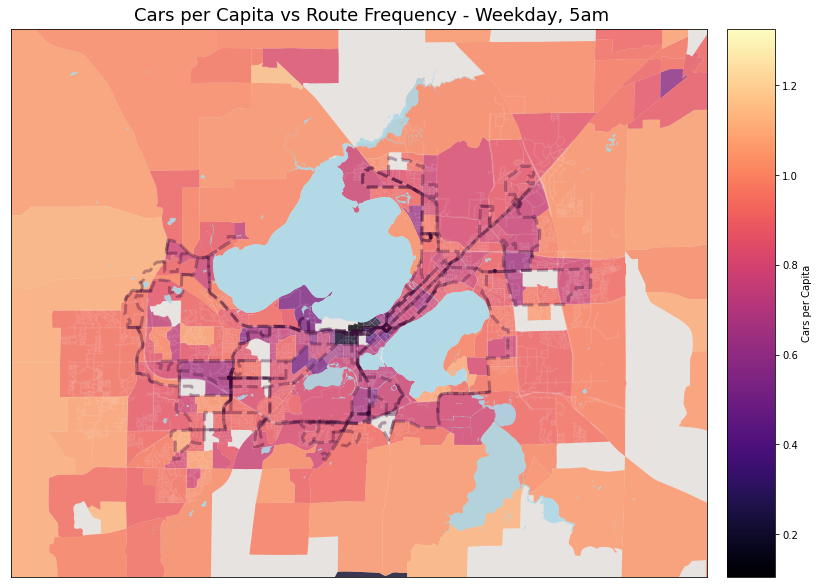

In [22]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 5am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency5am'
colName = 'frequency_5am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

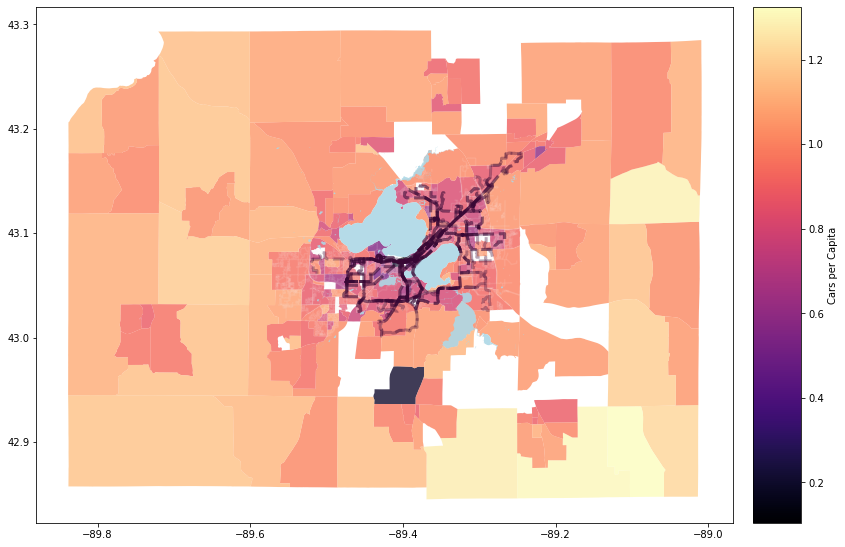

In [23]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 6am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency6am'
colName = 'frequency_6am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 7am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency7am'
colName = 'frequency_7am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 8am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency8am'
colName = 'frequency_8am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 9am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency9am'
colName = 'frequency_9am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 10am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency10am'
colName = 'frequency_10am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 11am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency11am'
colName = 'frequency_11am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 12pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency12pm'
colName = 'frequency_12pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 1pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency1pm'
colName = 'frequency_1pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 2pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency2pm'
colName = 'frequency_2pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 3pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency3pm'
colName = 'frequency_3pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 4pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency4pm'
colName = 'frequency_4pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 5pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency5pm'
colName = 'frequency_5pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 6pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency6pm'
colName = 'frequency_6pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 7pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency7pm'
colName = 'frequency_7pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 8pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency8pm'
colName = 'frequency_8pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 9pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency9pm'
colName = 'frequency_9pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 10pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency10pm'
colName = 'frequency_10pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 11pm"
savefigName = 'PaperFigures/CarOwnershipVSfrequency11pm'
colName = 'frequency_11pm'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()

In [ ]:
suptitle = "Cars per Capita vs Route Frequency - Weekday, 12am"
savefigName = 'PaperFigures/CarOwnershipVSfrequency12am'
colName = 'frequency_12am'

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=-1.5)

df_dane.plot(column='VehiclesPerCapita', ax=ax, legend=True, legend_kwds={'label': "Cars per Capita"}, cax=cax, cmap='magma', alpha=.8)

lakeShapes_df.plot(color='lightblue', alpha=.9, ax=ax)
streetShapes_df.plot(color='#fbf7f4', alpha=.1, ax=ax)

for i in route_freq_wkday:
    for j in range(routesShapes_df.loc[routesShapes_df['route_shor']==i, colName].item()):
        routesShapes_df[routesShapes_df['route_shor']==i].plot(ax=ax, linestyle="--", alpha=.35, linewidth=3, color='#380835')

ax.set_facecolor("#e7e3e0")
ax.set_xlim(-89.6, -89.2)
ax.set_ylim(42.97, 43.2)
ax.set_yticks([])
ax.set_xticks([])

fig.suptitle(suptitle, fontsize=18, x=.55, y=.76)
plt.savefig(savefigName, bbox_inches='tight')
plt.show()